## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
from keras import layers

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-07-25 22:29:32.361860: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], axis=1, inplace=True)


In [3]:
# Determine the number of unique values in each column.
for col in application_df.columns:
    print(col, ': ',len(application_df[col].unique()))

APPLICATION_TYPE :  17
AFFILIATION :  6
CLASSIFICATION :  71
USE_CASE :  5
ORGANIZATION :  4
STATUS :  2
INCOME_AMT :  9
SPECIAL_CONSIDERATIONS :  2
ASK_AMT :  8747
IS_SUCCESSFUL :  2


In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9','T13','T12','T2','T25','T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_valuecounts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = classification_valuecounts[classification_valuecounts < 150].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
y = application_df['IS_SUCCESSFUL'].values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
hidden_layer1 = 100
hidden_layer2 = 50
hidden_layer3 = 25
# hidden_layer4 = 10


nn = tf.keras.Sequential(
    [
        # First hidden layer
        layers.Dense(hidden_layer1, activation="relu"),
        # Dropout Regularization
        layers.Dropout(.2),
        # Second hidden layer
        layers.Dense(hidden_layer2, activation="relu"),
        # Third hidden layer
        layers.Dense(hidden_layer3, activation='relu'),
        # Dropout Regularization
#         layers.Dropout(.2, input_shape=(2,)),
        # Third hidden layer
#         layers.Dense(hidden_layer4, activation='relu'),
        # Dropout Regularization
#         layers.Dropout(.2, input_shape=(2,)),
        # Output layer
        layers.Dense(1, activation='sigmoid'),
    ]
)
# call model on training data
nn(X_train_scaled)
# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (24009, 100)              4700      
                                                                 
 dropout (Dropout)           (24009, 100)              0         
                                                                 
 dense_1 (Dense)             (24009, 50)               5050      
                                                                 
 dense_2 (Dense)             (24009, 25)               1275      
                                                                 
 dense_3 (Dense)             (24009, 1)                26        
                                                                 
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________


2023-07-25 22:29:38.767359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# Compile the model
nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['acc'])


In [14]:
# Stop training when overfitting occurs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

In [15]:
# Train the model
history = nn.fit(X_train_scaled, y_train, batch_size=8, 
                 validation_split=0.2, epochs=100, callbacks=[callback])

Epoch 1/100
2401/2401 [==============================] - 5s 2ms/step - loss: 0.5782 - acc: 0.7147 - val_loss: 0.5555 - val_acc: 0.7362
Epoch 2/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5612 - acc: 0.7254 - val_loss: 0.5510 - val_acc: 0.7343
Epoch 3/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5589 - acc: 0.7257 - val_loss: 0.5468 - val_acc: 0.7391
Epoch 4/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5560 - acc: 0.7281 - val_loss: 0.5493 - val_acc: 0.7353
Epoch 5/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5546 - acc: 0.7296 - val_loss: 0.5480 - val_acc: 0.7359
Epoch 6/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5521 - acc: 0.7294 - val_loss: 0.5481 - val_acc: 0.7349
Epoch 7/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5526 - acc: 0.7293 - val_loss: 0.5466 - val_acc: 0.7368
Epoch 8/100
2401/2401 [==============================] 

2401/2401 [==============================] - 4s 2ms/step - loss: 0.5404 - acc: 0.7370 - val_loss: 0.5430 - val_acc: 0.7397
Epoch 62/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5400 - acc: 0.7360 - val_loss: 0.5436 - val_acc: 0.7393
Epoch 63/100
2401/2401 [==============================] - 4s 2ms/step - loss: 0.5410 - acc: 0.7366 - val_loss: 0.5436 - val_acc: 0.7397


In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

322/322 - 0s - loss: 0.5559 - acc: 0.7285 - 343ms/epoch - 1ms/step
Loss: 0.5558937788009644, Accuracy: 0.7284742593765259


In [17]:
def plot_metric(history, metric='loss'):
    """ Plot training and test values for a metric. """

    val_metric = 'val_'+metric
    plt.plot(history.history[metric])
    plt.plot(history.history[val_metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show();

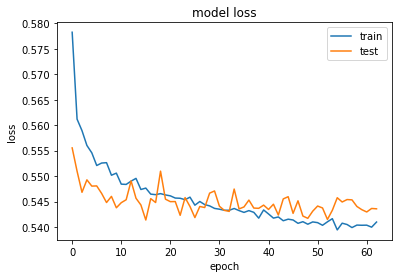

In [18]:
# Plot the model to check for overfitting
plot_metric(history)

Let us now use Keras Tuner so that we can find the optimal hyperparameters for our neural network application.

In [24]:
import keras_tuner
from tensorflow import keras


In [62]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=46))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [63]:
# Initialize a tuner w/ Hyperband Alg
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    project_name = 'AlphabetSoupCharity_project',
    hyperband_iterations=2)

INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Trial 224 Complete [00h 00m 26s]
val_accuracy: 0.7314868569374084

Best val_accuracy So Far: 0.7338192462921143
Total elapsed time: 00h 28m 56s

Search: Running Trial #225

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
6                 |26                |first_units
4                 |2                 |num_layers
6                 |21                |units_0
6                 |21                |units_1
26                |16                |units_2
26                |16                |units_3
21                |21                |units_4
34                |12                |tuner/epochs
12                |4                 |tuner/initial_epoch
2                 |4                 |tuner/bracket
1                 |2                 |tuner/round
0205              |0102              |tuner/trial_id

Epoch 13/34
458/751 [=================>............] - ETA: 0s - loss: 0.5566 - accuracy: 0.7301

In [ ]:
best_model = tuner.get_best_models()[0]

In [19]:
# Export our best model to HDF5 file
best_model.save('Data/AlphabetSoupCharity_Optimization.h5')